# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\DHRUVS~1\AppData\Local\Temp/ipykernel_18288/2766588354.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Data Exploring 

In [2]:
O_data = pd.read_csv("New_Data.csv" , sep = "," , encoding = 'utf-8')
data = pd.read_csv("New_Data.csv" , sep = "," , encoding = 'utf-8')

In [4]:
import pandas as pd
import pyarrow as pa
hdfs_config = {
     "host" : "127.0.0.1",
     "port" : 8020,
     "user" : "user"
}
fs = pa.hdfs.connect(hdfs_config['host'], hdfs_config['port'], 
user=hdfs_config['user'])
data=pd.read_csv(fs.open("/New_Data.csv"))
data = pd.read_csv("New_Data.csv" , sep = "," , encoding = 'utf-8')

In [5]:
hdfs_config

{'host': '127.0.0.1', 'port': 8020, 'user': 'user'}

## Dataset Report

In [4]:
#profile = ProfileReport(data)

In [5]:
#profile

In [6]:
data.shape 

(253680, 23)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [8]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Glucose
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,108
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,111
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,105
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,83
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,181


In [9]:
data["Glucose"] = data["Glucose"] >125
data["Glucose"]=data["Glucose"].astype(int)
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Glucose
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,0
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,1


In [10]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Glucose
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.385265
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.486659
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [11]:
#shuf=data.iloc[:,3]
#data=data.drop('Glucose',axis=1)

In [12]:
#shuf=shuf.dropna()

In [13]:
#shuf=shuf.astype(int)
#np.random.choice(shuf, size=len(data))

In [14]:
#data["Glucose"] = np.random.choice(shuf, size=len(data))

In [15]:
#data=data.drop('Glucose_2',axis=1)
#data.head()

In [16]:
#data.to_csv("New_Data.csv")

In [17]:
#data["Glucose"] = data["Glucose"] >125

In [18]:
#print(data["Glucose"])

In [19]:
#data["Glucose"]=data["Glucose"].astype(int)
#print(data["Glucose"])


# Preprocessing

In [20]:
#Transform the data to integer

In [21]:
data["Diabetes_binary"] = data["Diabetes_binary"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

**Check null values**

In [23]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Glucose                 0
dtype: int64

**checking unique values in different variables**

In [24]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [25]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [26]:
v_counts(data)

0    218334
1     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
____________________________________________

**Check The Outliers**

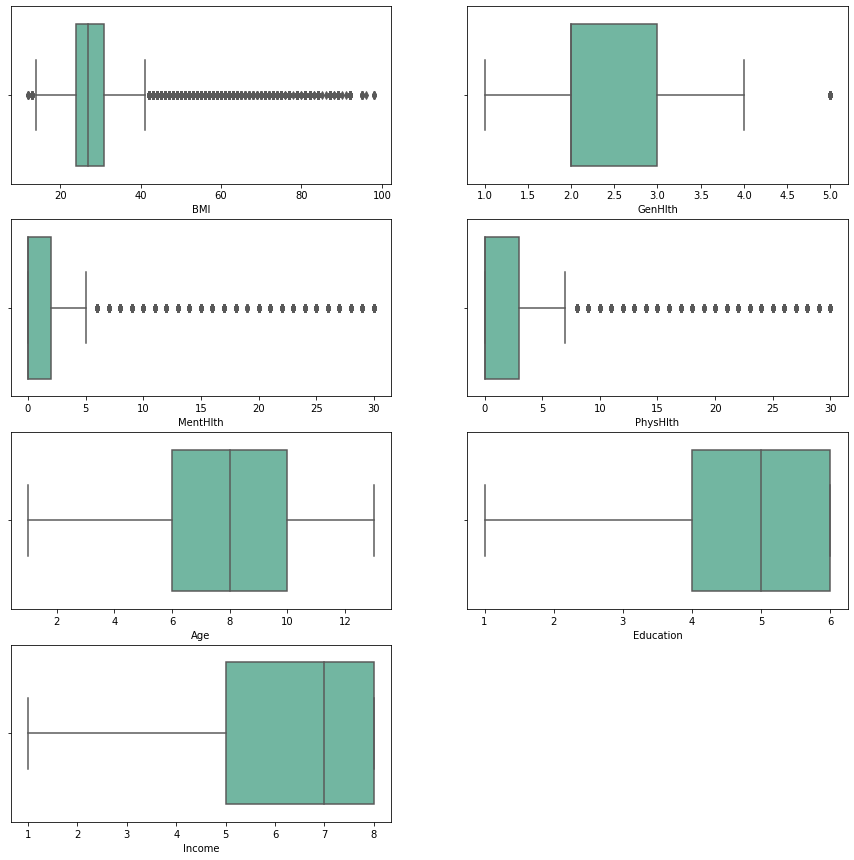

In [27]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

there is no outlayers in our data 

**Check and drop dublicated data**

In [28]:
data.duplicated().sum()

17443

In [29]:
data.drop_duplicates(inplace = True)

In [30]:
data.duplicated().sum()

0

In [31]:
data.shape

(236237, 23)

# ** EDA**

In [32]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic 
#adding new column Diabetes_binary_str  

data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

In [33]:
#help us to show the categorical variable 
data2 = data.copy() 

In [91]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'
import hdbscan as adbscan
data2.Diabetes_binary[data2['Diabetes_binary'] == 0] = 'No Diabetes'
data2.Diabetes_binary[data2['Diabetes_binary'] == 1] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

data2.Glucose[data2['Glucose']==0] ='non-diabetic'
data2.Glucose[data2['Glucose']==1] ='diabetic'

# EDA

Text(0.5, 1.0, 'correlation of feature')

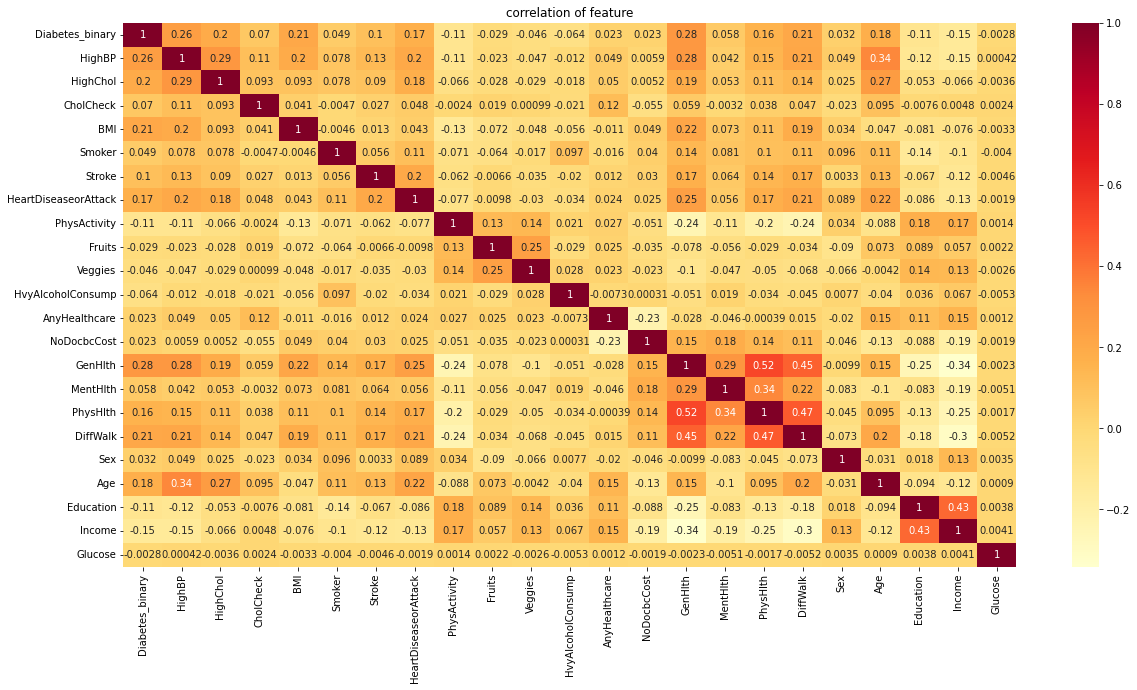

In [35]:
#using heatmap to understand correlation better in dataset data 
#Heatmap of correlation


plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

Correlation heatmap show relation between columns:

(GenHlth ,PhysHlth ),(PhysHlth , DiffWalk),(GenHlth ,DiffWalk )are highly correleted with each other => **positive relation**


(GenHlth ,Income ) , (DiffWalk , Income) are highly correleted with each other => **Negative relation**

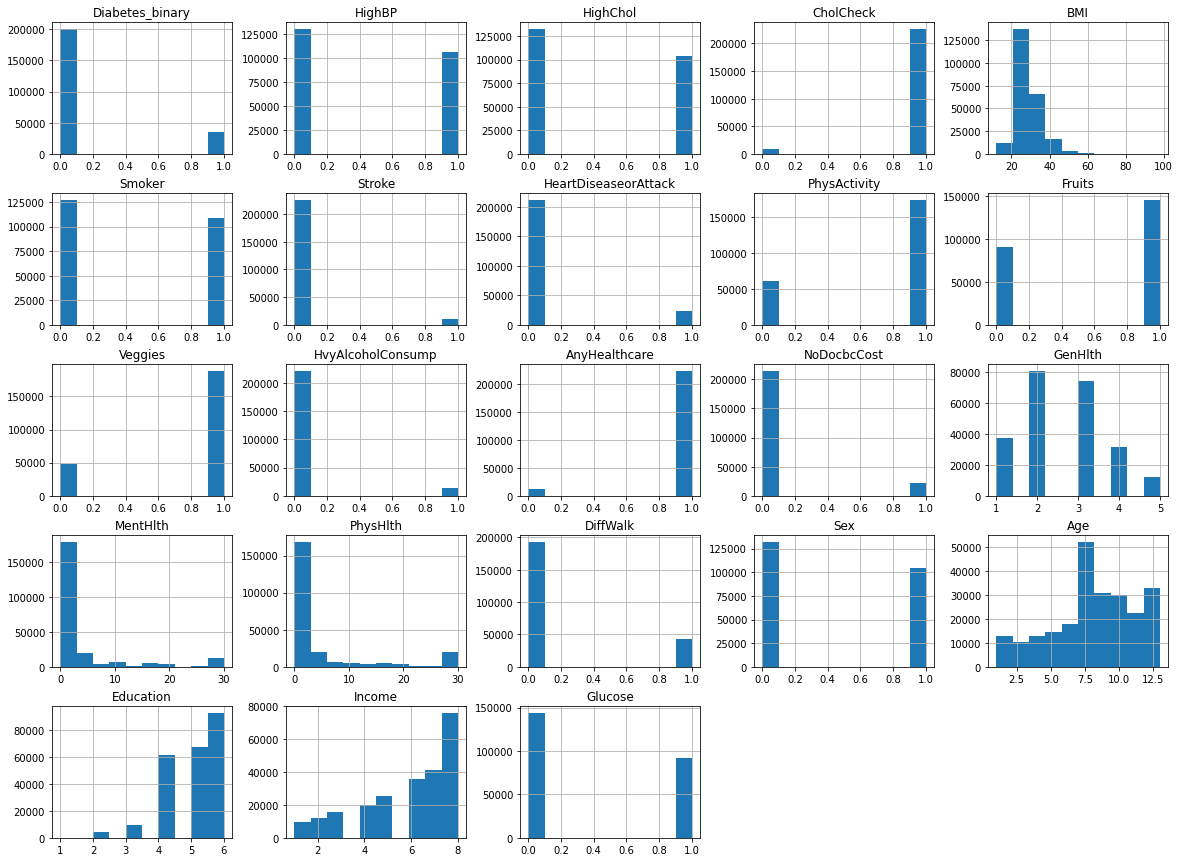

In [36]:
#using histogram to understand dataset data better

data.hist(figsize=(20,15));

**Visualization Of [Yes - NO] Columns and their relation with the target**

In [37]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [38]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

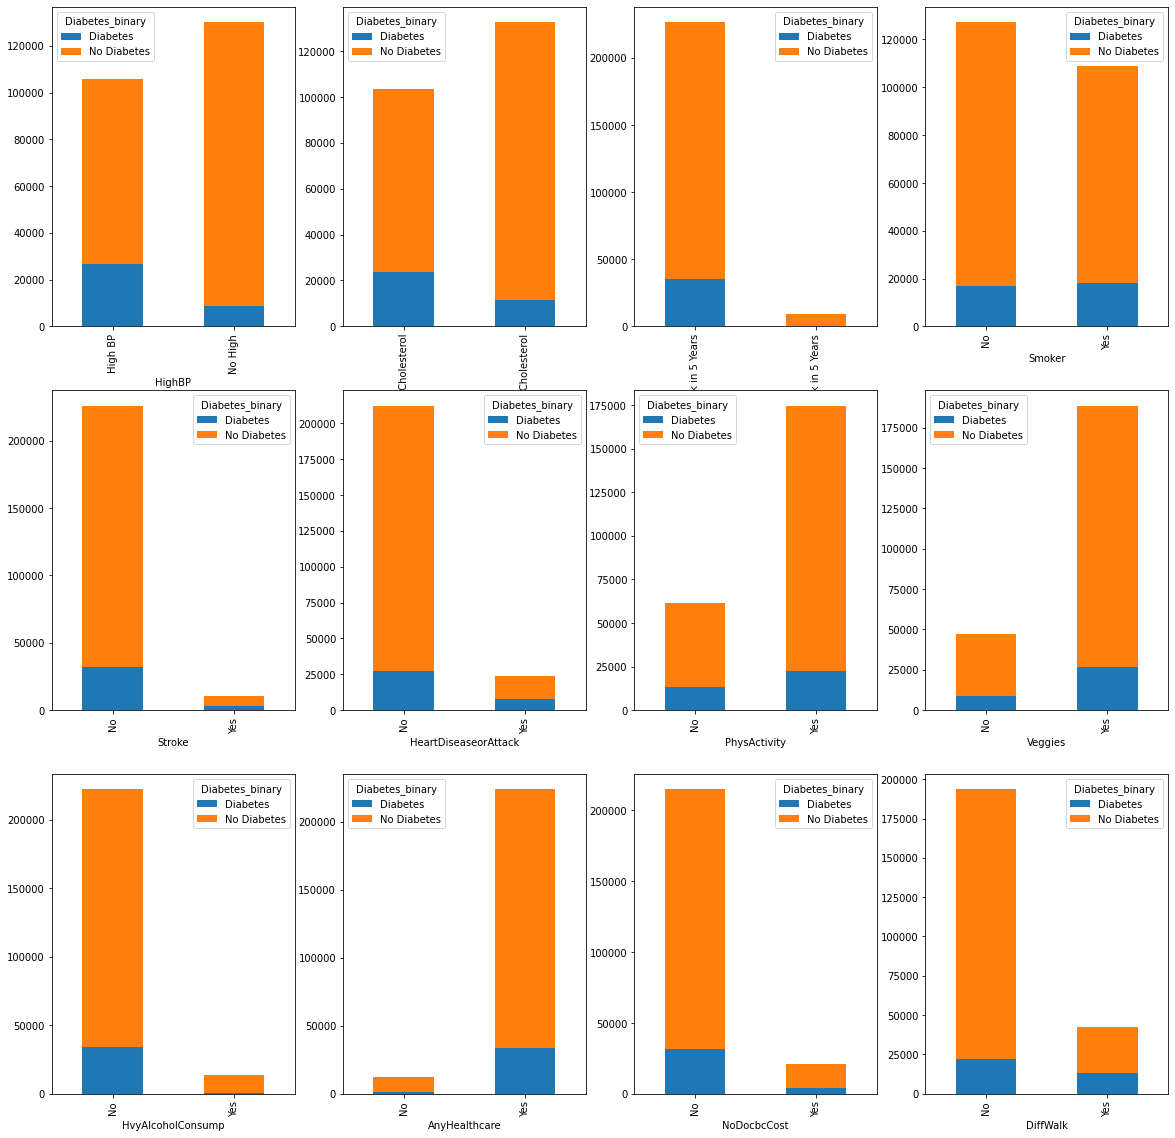

In [39]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

**Let's view our target values "Daibetes_binary"**

In [40]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person

data2["Diabetes_binary"].value_counts()

No Diabetes    201033
Diabetes        35204
Name: Diabetes_binary, dtype: int64

We can see that healthy people is more than people with diabetes 

**The feature "Age" and it's relation with the target**

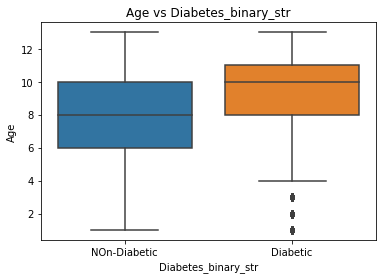

In [41]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary_str')
plt.show()

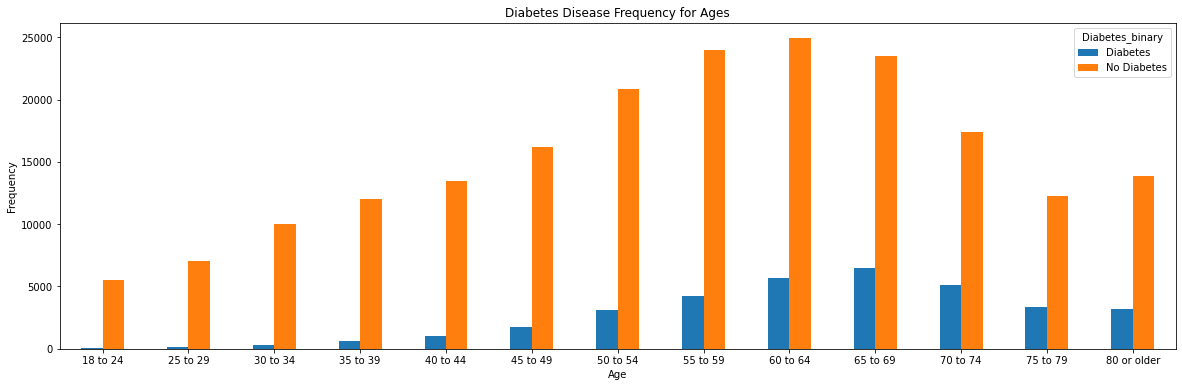

In [42]:
pd.crosstab(data2.Age,data2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


We know that as the age increases, the chances of diabetes also commonly increases. From above we can say, the median of the age of diabetic people is greater than that of non-diabetic people.

**The feature "Education" and it's relation with the target**

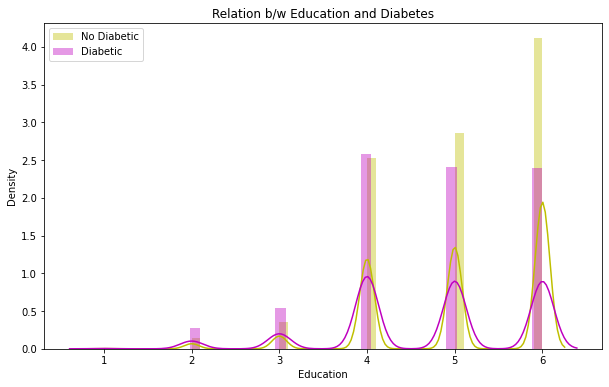

In [43]:
plt.figure(figsize=(10,6))


sns.distplot(data.Education[data.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

We can see that most of people have high education and in the high level of education , the healthy people is more than others

**The feature "income" and it's relation with the target**

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 1440x720 with 0 Axes>

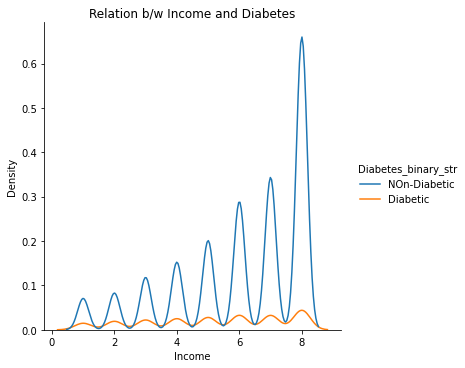

In [44]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relation b/w Income and Diabetes")

We can see that most of people have high income and in the high level of income , the healthy people is more than others

**The feature "BMI" and it's relation with the target**

As we can see people range between 24-33 BMI have more likely to have Diabetic.

**The feature "MentHlth" and it's relation with the target**

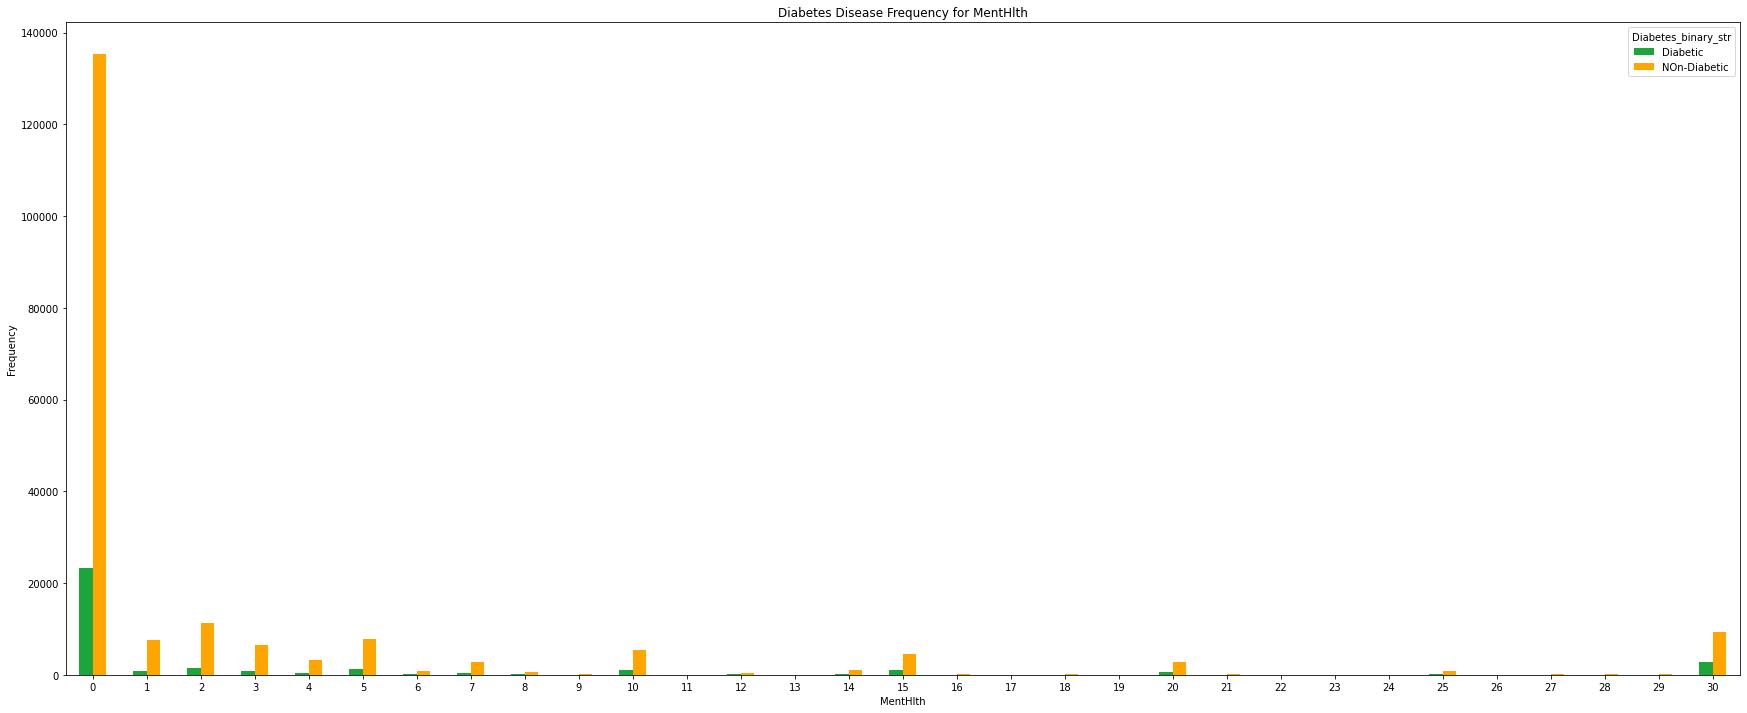

In [45]:
pd.crosstab(data.MentHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that Menthlth Group 0-5 have impact on Diabetic

**The feature "PhysHlth" and it's relation with the target**

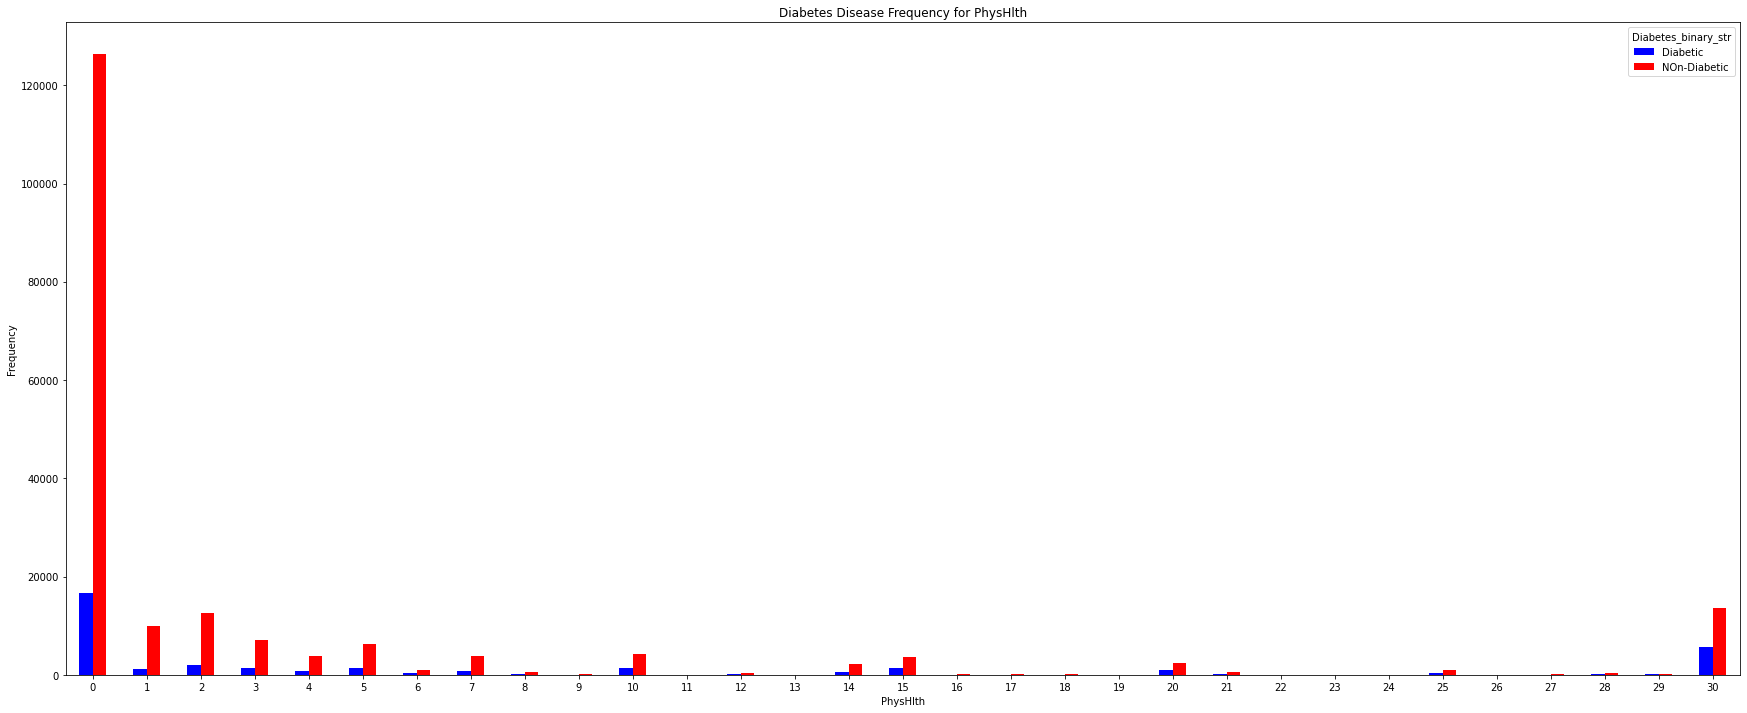

In [46]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary_str).plot(kind="bar",figsize=(30,12),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

From figure we can say that PhysHlth Group 0-5 have impact on Diabetic

**The feature "GenHlth" and it's relation with the target**

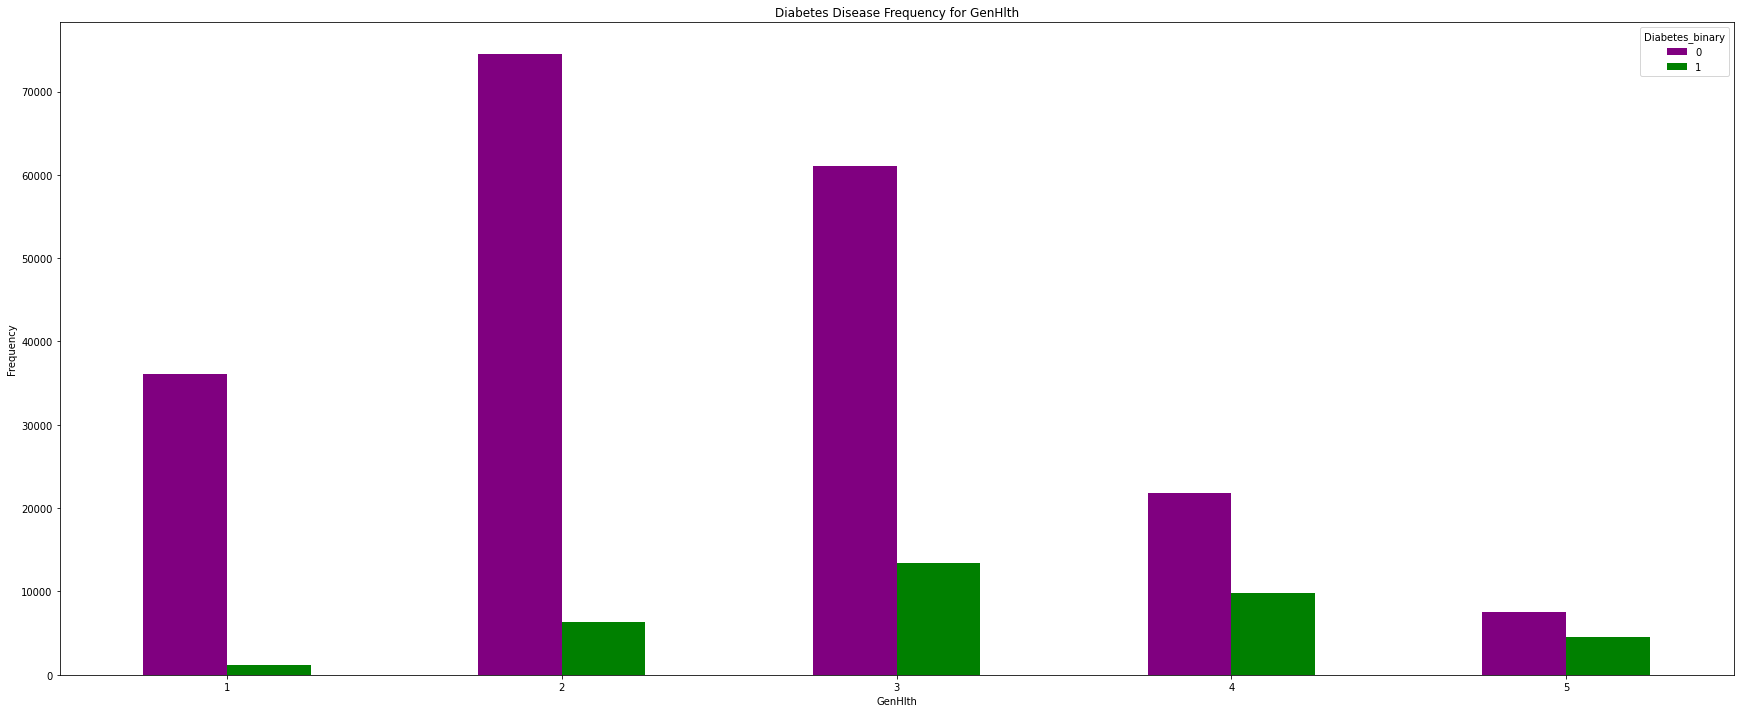

In [47]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

not many peolpe have "5" and "4" of GenHlth  ,but they have diabetes !!!

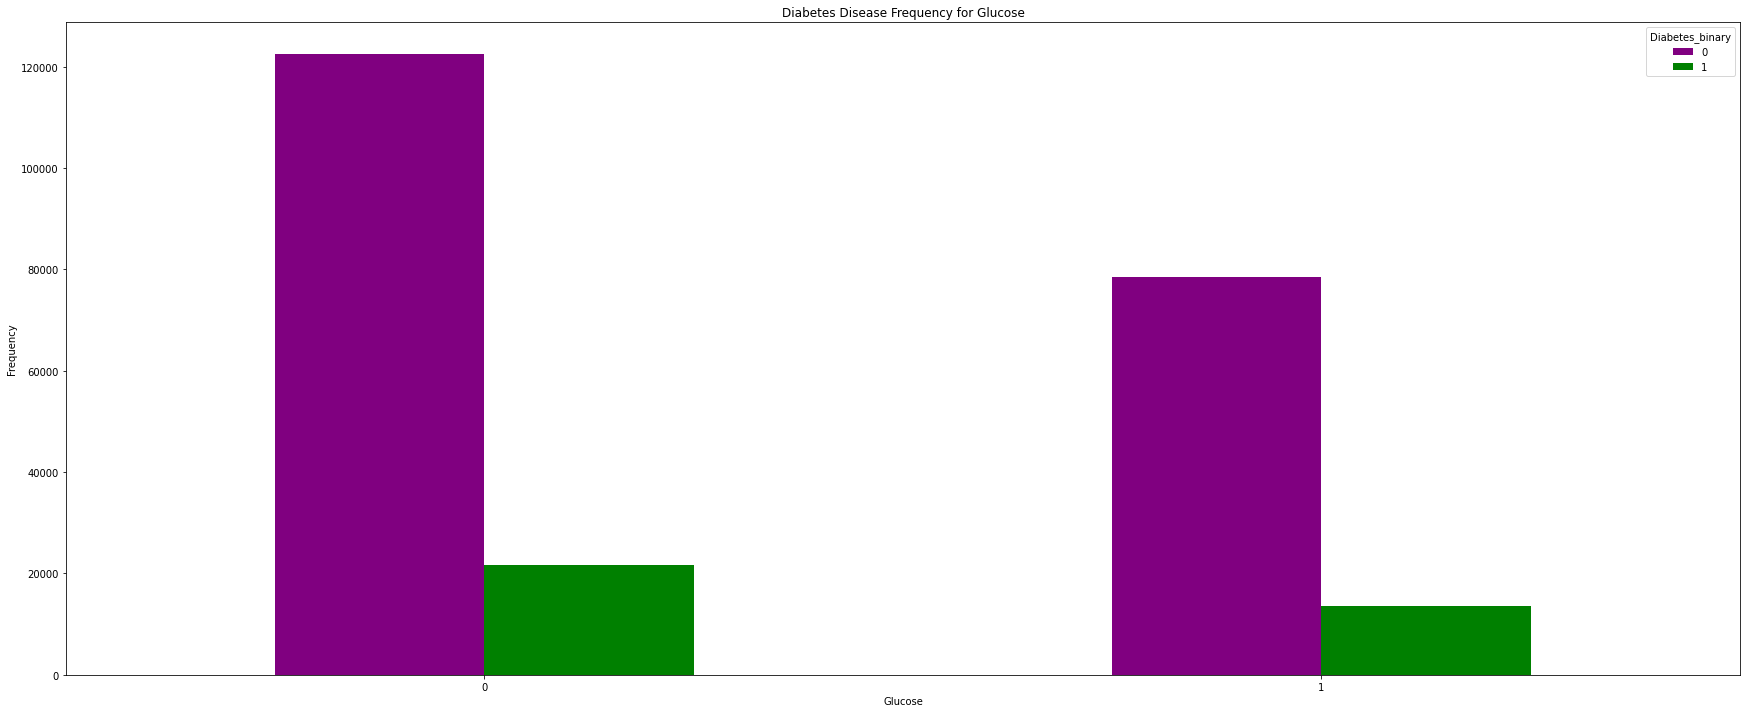

In [48]:
pd.crosstab(data.Glucose,data.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for Glucose')
plt.xlabel('Glucose')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

# Feature Selections

**With correlation**

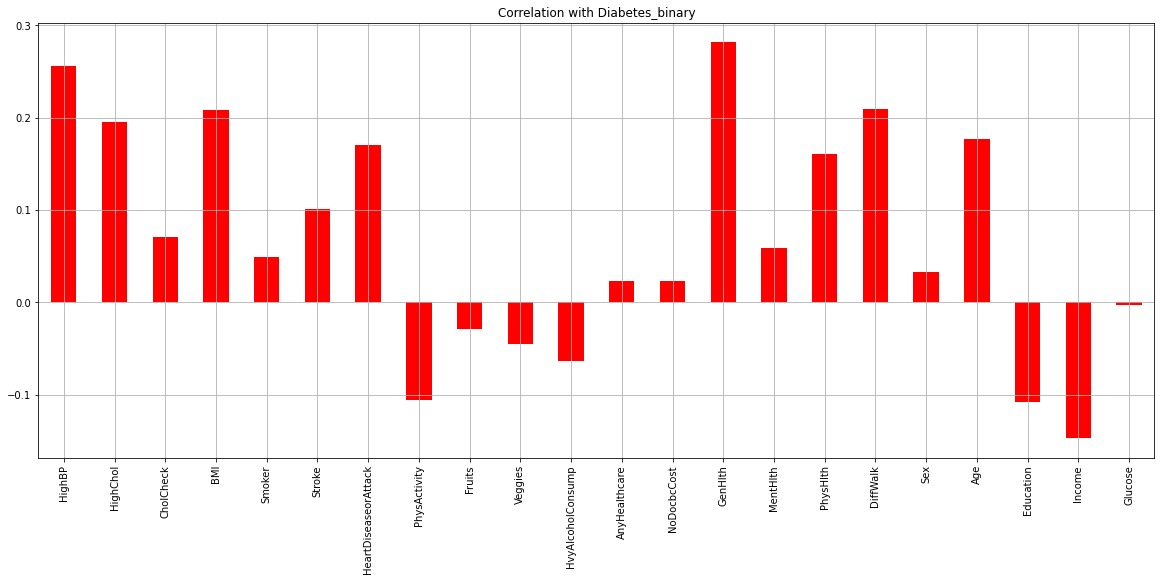

In [49]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="red");

**Diabetes_binary's relation with other columns Through bar Graph Result:**

1. Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

**VIF Test**

In [50]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(O_data)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   131.208907
Diabetes_binary           1.193121
HighBP                    1.344511
HighChol                  1.180937
CholCheck                 1.033501
BMI                       1.160282
Smoker                    1.091874
Stroke                    1.081617
HeartDiseaseorAttack      1.175776
PhysActivity              1.157404
Fruits                    1.112540
Veggies                   1.112425
HvyAlcoholConsump         1.025421
AnyHealthcare             1.113213
NoDocbcCost               1.144202
GenHlth                   1.821914
MentHlth                  1.239506
PhysHlth                  1.623302
DiffWalk                  1.536655
Sex                       1.075766
Age                       1.354966
Education                 1.326495
Income                    1.505652
Glucose                   1.000121
dtype: float64


In [51]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [52]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constent Features: ",len(X.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
No. of Non-Constent Features:  23


In [53]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

1
const


In [54]:
X2=X.drop(constant_columns,axis=1)
X2=X.drop(constant_columns,axis=1)

In [55]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
#mutual_info = mutual_info_classif(X_train, utils.multiclass.type_of_target(y_train.astype('int')))
mutual_info=X.describe()
mutual_info

,const,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Glucose
count,253680.0,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,1.0,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,120.830456
std,0.0,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,31.919949
min,1.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,99.000000
50%,1.0,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,117.000000
75%,1.0,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,140.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000


**ANOVA Test**

In [56]:
X = O_data.iloc[:,1:]
Y = O_data.iloc[:,0]

In [57]:
# ANOVA feature selection for numeric input and categorical output


# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [58]:
pd.DataFrame(X_selected).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1,1,40,0,5,15,1,9,4,3
1,0,0,25,0,3,0,0,7,6,1
2,1,1,28,0,5,30,1,9,4,8


**Chi Square**

In [59]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,10029.013935
1,HighChol,5859.710582
2,CholCheck,39.716825
3,BMI,18355.166400
4,Smoker,521.978858
5,Stroke,2725.225194
6,HeartDiseaseorAttack,7221.975378
7,PhysActivity,861.887532
8,Fruits,154.291404
9,Veggies,153.169215


In [60]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412


In [61]:
#there are the features which we will use in our model

We will use those features in our model

"Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" will not be with us 

In [62]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_binary_str"]

In [63]:
data.drop(colomns , axis= 1 ,inplace=True)

# Data Splitting 

In [64]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

In [65]:
X.shape

(236237, 17)

In [66]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [67]:
# transforms for the feature union
transforms = list()
transforms.append(('mms', MinMaxScaler()))
transforms.append(('ss', StandardScaler()))
transforms.append(('rs', RobustScaler()))
transforms.append(('qt', QuantileTransformer(n_quantiles=100, output_distribution='normal')))
transforms.append(('kbd', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')))
transforms.append(('pca', PCA(n_components=7)))
transforms.append(('svd', TruncatedSVD(n_components=7)))

In [68]:
# create the feature union
fu = FeatureUnion(transforms)

In [69]:
# define the feature selection
rfe = RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=15)

In [70]:
# define the model
model = LogisticRegression(solver='liblinear')
print("Transformation Set Useing Selected Data for for OGFS:\n",transforms)

Transformation Set Useing Selected Data for for OGFS:
 [('mms', MinMaxScaler()), ('ss', StandardScaler()), ('rs', RobustScaler()), ('qt', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('kbd', KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')), ('pca', PCA(n_components=7)), ('svd', TruncatedSVD(n_components=7))]


In [71]:
# define the pipeline
steps = list()
steps.append(('fu', fu))
y_pred = [1, 2, 3, 4]
steps.append(('rfe', rfe))
y_true = [5, 6, 5,8]
steps.append(('m', model))
pipeline = Pipeline(steps=steps)

In [72]:
print("TransformsSteps",steps,"\n\n",pipeline)

TransformsSteps [('fu', FeatureUnion(transformer_list=[('mms', MinMaxScaler()),
                               ('ss', StandardScaler()), ('rs', RobustScaler()),
                               ('qt',
                                QuantileTransformer(n_quantiles=100,
                                                    output_distribution='normal')),
                               ('kbd',
                                KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                 strategy='uniform')),
                               ('pca', PCA(n_components=7)),
                               ('svd', TruncatedSVD(n_components=7))])), ('rfe', RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=15)), ('m', LogisticRegression(solver='liblinear'))] 

 Pipeline(steps=[('fu',
                 FeatureUnion(transformer_list=[('mms', MinMaxScaler()),
                                                ('ss', StandardScaler()),
                 

In [73]:
# define the cross-validation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [74]:
print(cv)

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)


In [75]:
from hdfs.ext.kerberos import KerberosClient
import pyarrow as pa
import pyarrow.parquet as pq

In [76]:
#hdfs = pa.hdfs.connect('hostname_hadoop_master/ip_hadoop_master', port=50070, kerb_ticket='/tmp/krb5cc_1000')

In [77]:
import pandas as pd

# Setup:
df = data[['Diabetes_binary', 'HighBP','HighChol','HeartDiseaseorAttack','DiffWalk']]#pd.DataFrame(np.random.rand(10000, 3), columns=list("abc"))
def some_func(a, b, c,d,e):
    return a*b*c*d*e

# Using apply:
%timeit df['Dia_binary'] = df.apply(lambda x: some_func(a = x['Diabetes_binary'], b = x['HighBP'], c = x['HighChol'],d=x['HeartDiseaseorAttack'],e=x['DiffWalk']), axis=1)

4.92 s ± 524 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [78]:
#dg1=df1[5],df2[5]
df

,Diabetes_binary,HighBP,HighChol,HeartDiseaseorAttack,DiffWalk,Dia_binary
0,0,1,1,0,1,0
1,0,0,0,0,0,0
2,0,1,1,0,1,0
3,0,1,0,0,0,0
4,0,1,1,0,0,0
...,...,...,...,...,...,...
253675,0,1,1,0,0,0
253676,1,1,1,0,1,0
253677,0,0,0,0,0,0
253678,0,1,0,0,0,0


In [79]:
# Setup:
df1 = data[['Glucose', 'HighBP','PhysActivity']]#pd.DataFrame(np.random.rand(10000, 3), columns=list("abc"))
def some_func(a, b, c):
    return a*b*c

# Using apply:
%timeit df1['Glucz'] = df1.apply(lambda x: some_func(a = x['Glucose'], b = x['HighBP'],c=x['PhysActivity']), axis=1)

3.9 s ± 525 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [80]:
df1

,Glucose,HighBP,PhysActivity,Glucz
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,0
4,1,1,1,1
...,...,...,...,...
253675,1,1,0,0
253676,0,1,0,0
253677,0,0,1,0
253678,0,1,0,0


In [81]:
# Setup:
df2 = data[['Stroke', 'Smoker','HeartDiseaseorAttack']]#pd.DataFrame(np.random.rand(10000, 3), columns=list("abc"))
def some_func(a, b, c):
    return a*b*c

# Using apply:
%timeit df2['Str'] = df2.apply(lambda x: some_func(a = x['Stroke'], b = x['Smoker'],c=x['HeartDiseaseorAttack']), axis=1)

3.72 s ± 595 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [82]:
df2

,Stroke,Smoker,HeartDiseaseorAttack,Str
0,0,1,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
253675,0,0,0,0
253676,0,0,0,0
253677,0,0,0,0
253678,0,0,0,0


In [83]:
# Setup:
df3 = data[['Age','HighChol','Smoker']]#pd.DataFrame(np.random.rand(10000, 3), columns=list("abc"))
def some_func(a, b, c):
    return a*b*c

# Using apply:
%timeit df3['Ag'] = df3.apply(lambda x: some_func(a = x['Age'], b = x['HighChol'],c=x['Smoker']), axis=1)

3.09 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [84]:
df3

,Age,HighChol,Smoker,Ag
0,9,1,1,9
1,7,0,1,0
2,9,1,0,0
3,11,0,0,0
4,11,1,0,0
...,...,...,...,...
253675,5,1,0,0
253676,11,1,0,0
253677,2,0,0,0
253678,7,0,0,0


In [85]:
type(df['Dia_binary'])

pandas.core.series.Series

In [86]:
dfnew=df#'Diabetes_binary', 'HighBP','HighChol','HeartDiseaseorAttack','DiffWalk'
#dfnew=dfnew.drop('HighBP',axis=1)
dfnew=dfnew.drop('Diabetes_binary',axis=1)
#dfnew=dfnew.drop('HighChol',axis=1)
#dfnew=dfnew.drop('HeartDiseaseorAttack',axis=1)
dfnew=dfnew.drop('DiffWalk',axis=1)
dfnew['Diabetes_binary']=df['Dia_binary']
dfnew['Glucose']=df1.iloc[:,3]
dfnew['Stroke']=df2.iloc[:,3]
dfnew['Age1']=df3.iloc[:,3]
dfnew=dfnew.drop('Dia_binary',axis=1)
cols = dfnew.columns.tolist()
cols = cols[-4:] + cols[:-4]
dfnew=dfnew[cols]
#dfnew.rename(columns = {'Dia_binary':'Diabaties'}, inplace = True)
dfnew.head()

,Diabetes_binary,Glucose,Stroke,Age1,HighBP,HighChol,HeartDiseaseorAttack
0,0,0,0,9,1,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,1,0


In [87]:
dfnew=dfnew.iloc[:6237]
dfnew.shape

(6237, 7)

In [140]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
ADBLabel=[]
class adbscen:
    def init_c():
        centers = [(0, 4), (5, 5) , (8,2)]
        cluster_std = [1.2, 1, 1.1]
        plt.scatter(X[y == 0, 0], X[y == 0, 1], s=10, label="Cluster1")
        plt.scatter(X[y == 1, 0], X[y == 1, 1], s=10, label="Cluster2")
        plt.scatter(X[y == 2, 0], X[y == 2, 1], s=10, label="Cluster3")
        plt.title("Scattered data")
    def adbscen(data, algorithm, args, kwds):
        start_time = time.time()
        global labels
        labels = algorithm(*args, **kwds).fit_predict(data)
        ADBLabel=labels
        end_time = time.time()
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
        plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        plt.title('Clusters found by ADBSCAN', fontsize=24)#.format(str(algorithm.__name__)), fontsize=24)
        plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [141]:
from sklearn.cluster import DBSCAN
std_slc = StandardScaler()
X_std = std_slc.fit_transform(dfnew)

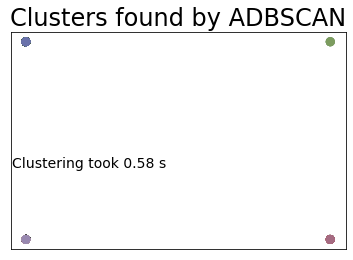

In [142]:
import time
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
adbscen.adbscen(X_std, adbscan.HDBSCAN, (), {'min_cluster_size':15})

In [119]:
len(labels)

6237

In [120]:
#clusters = pd.DataFrame(model.fit_predict(X_std))
dfnew["Clusters"] = labels #clusters.to_numpy()#clusters.dropna().astype(int).replace(np.nan, 0)
dfnew["Clusters"].unique()

array([19,  5, 11,  6,  4, 45, 43, 15, 20, 34, 13, 12, 17,  2,  1, -1, 25,
       32, 18, 41, 31, 38, 16,  8, 29, 37,  0,  7, 21, 33, 22, 42,  9, 27,
       26, 35, 30, 44, 14, 36, 28, 39, 10,  3, 23, 24, 40], dtype=int64)

In [121]:
dfnew.head()

,Diabetes_binary,Glucose,Stroke,Age1,HighBP,HighChol,HeartDiseaseorAttack,Clusters
0,0,0,0,9,1,1,0,19
1,0,0,0,0,0,0,0,5
2,0,0,0,0,1,1,0,11
3,0,0,0,0,1,0,0,6
4,0,1,0,0,1,1,0,4


In [122]:
dfnew.shape

(6237, 8)

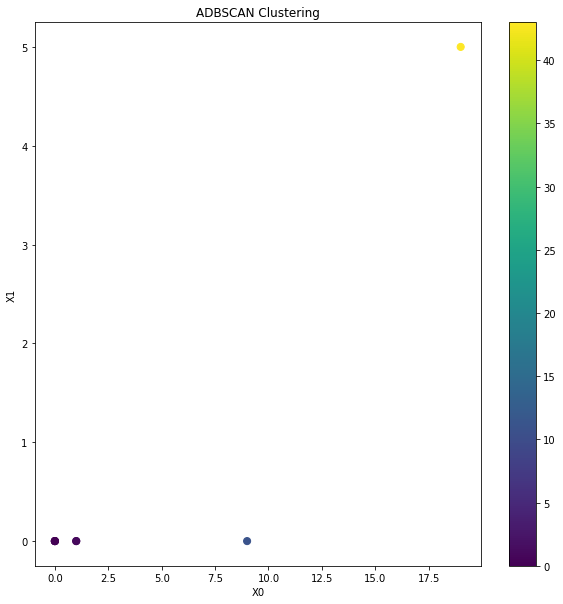

In [123]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(dfnew.iloc[0],dfnew.iloc[1], c=dfnew.iloc[7],s=50)
ax.set_title("ADBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

Text(0.5, 1.0, 'correlation of feature')

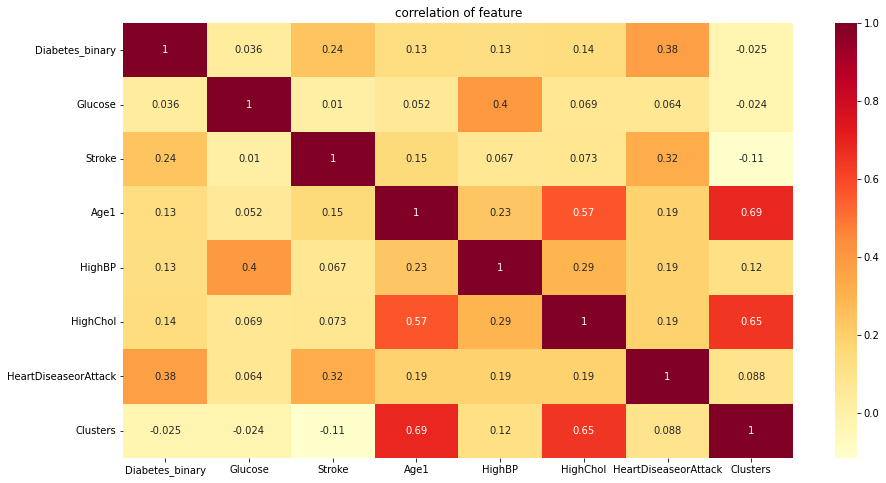

In [124]:
plt.figure(figsize = (15,8))
sns.heatmap(dfnew.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [125]:
def f(x):
    return x * x
res = map(f, dfnew.iloc[7])
res 

In [126]:
print(*res)

0 1 0 121 1 1 0 1849


In [127]:
dfnew.head()

,Diabetes_binary,Glucose,Stroke,Age1,HighBP,HighChol,HeartDiseaseorAttack,Clusters
0,0,0,0,9,1,1,0,19
1,0,0,0,0,0,0,0,5
2,0,0,0,0,1,1,0,11
3,0,0,0,0,1,0,0,6
4,0,1,0,0,1,1,0,4


In [128]:
from operator import mul
def some_func(a, b):
    return a*b
#rdd1, rdd2 = [2, 6, -3, 7], [1, -4, 5, 3]
map1 = map(mul, dfnew.iloc[0], dfnew.iloc[6])
dfmap1=dfnew[['Diabetes_binary','HeartDiseaseorAttack']]
%timeit dfmap1['Diabetes_binary0'] = dfmap1.apply(lambda x: some_func(a = x['Diabetes_binary'], b = x['HeartDiseaseorAttack']), axis=1)
map2 = map(mul, dfnew.iloc[1], dfnew.iloc[4])
dfmap2=dfnew[['Glucose','HighBP']]
%timeit dfmap2['Glucose0'] = dfmap2.apply(lambda x: some_func(a = x['Glucose'], b = x['HighBP']), axis=1)
map3 = map(mul, dfnew.iloc[2], dfnew.iloc[7])
dfmap3=dfnew[['Stroke','Clusters']]
%timeit dfmap3['Stroke0'] = dfmap3.apply(lambda x: some_func(a = x['Stroke'], b = x['Clusters']), axis=1)
map4 = map(mul, dfnew.iloc[3], dfnew.iloc[5])
dfmap4=dfnew[['Age1','HighChol']]
%timeit dfmap4['Age0'] = dfmap4.apply(lambda x: some_func(a = x['Age1'], b = x['HighChol']), axis=1)

51.6 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.4 ms ± 658 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
50 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
50 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [129]:
dfMR=dfmap1
dfMR=dfMR.drop('Diabetes_binary',axis=1)
dfMR=dfMR.drop('HeartDiseaseorAttack',axis=1)
dfMR['Glucose0']=dfmap2['Glucose0']
dfMR['Stroke0']=dfmap3['Stroke0']
dfMR['Age0']=dfmap4['Age0']
print(*map1)
print(*map2)
print(*map3)
print(*map4)

0 0 0 0 1 0 0 114
0 0 0 0 0 0 0 20
0 0 0 0 1 1 0 473
0 0 0 0 1 0 0 270


In [130]:
from functools import reduce
from operator import add
rdd = dfMR.iloc[0]
reduce(add, rdd)

9

In [131]:
dfMR.head()

,Diabetes_binary0,Glucose0,Stroke0,Age0
0,0,0,0,9
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0


In [132]:
dfMR.shape

(6237, 4)

In [133]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dfMR.iloc[:,1:],
    dfMR.iloc[:,0],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4365, 3), (1872, 3))

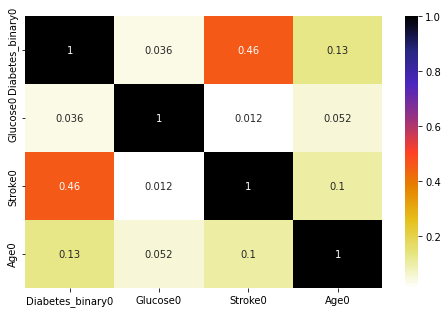

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(8,5))
cor = dfMR.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [135]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [136]:
import time
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
start = time.time()
model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [146]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['SVM'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.77%
Recall: 98.77%
Precision: 98.79%
F1-Score: 98.39%
time to train: 0.04 s
time to predict: 0.02 s
total: 0.06 s


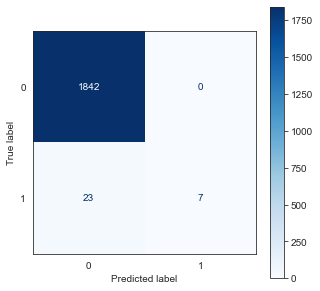

In [143]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [144]:
print('Report:\n',classification_report(y_test, y_predictions))

Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1842
           1       1.00      0.23      0.38        30

    accuracy                           0.99      1872
   macro avg       0.99      0.62      0.69      1872
weighted avg       0.99      0.99      0.98      1872



In [145]:
model.predict(X_test[4:5])

array([0])

In [149]:
#KNN
import time
X_train1,y_train1,X_test1,y_test1=X_train,y_train,X_test,y_test
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [150]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['KNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.61%
Recall: 98.61%
Precision: 98.63%
F1-Score: 98.08%
time to train: 0.01 s
time to predict: 0.12 s
total: 0.13 s


In [151]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test1, y_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1842
           1       1.00      0.13      0.24        30

    accuracy                           0.99      1872
   macro avg       0.99      0.57      0.61      1872
weighted avg       0.99      0.99      0.98      1872



<AxesSubplot:>

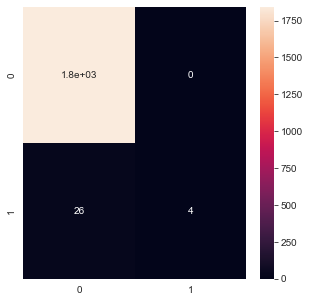

In [152]:
cnfm=confusion_matrix(y_test1, y_predictions)
sns.heatmap(cnfm, annot=True)

In [155]:
#DT
#%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model3 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train1,y_train1)
end_train = time.time()
y_pred3 = model3.predict(X_test1) # These are the predictions from the test data.
end_predict = time.time()

In [158]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test1, y_pred3)
recall = recall_score(y_test1, y_pred3, average='weighted')
precision = precision_score(y_test1, y_pred3, average='weighted')
f1s = f1_score(y_test1, y_pred3, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.77%
Recall: 97.77%
Precision: 97.79%
F1-Score: 97.39%
time to train: 0.03 s
time to predict: 0.00 s
total: 0.04 s


<AxesSubplot:>

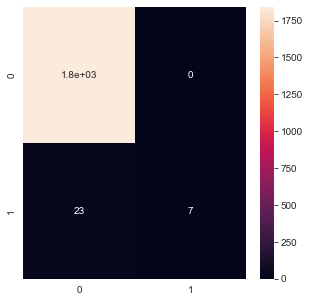

In [159]:
cnfm=confusion_matrix(y_test1, y_pred3)
sns.heatmap(cnfm, annot=True)

In [160]:
print(classification_report(y_test1, y_pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1842
           1       1.00      0.23      0.38        30

    accuracy                           0.99      1872
   macro avg       0.99      0.62      0.69      1872
weighted avg       0.99      0.99      0.98      1872



In [161]:
#%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
model4 = MultinomialNB().fit(X_train1,y_train1)
end_train = time.time()
y_pred4 = model4.predict(X_test1) # These are the predictions from the test data.
end_predict = time.time()

In [163]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test1, y_pred4)
recall = recall_score(y_test1, y_pred4, average='weighted')
precision = precision_score(y_test1, y_pred4, average='weighted')
f1s = f1_score(y_test1, y_pred4, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Naive Bayes'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.77%
Recall: 98.77%
Precision: 98.79%
F1-Score: 98.39%
time to train: 0.02 s
time to predict: 0.00 s
total: 0.02 s


<AxesSubplot:>

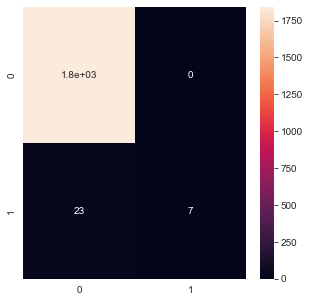

In [164]:
cnfm=confusion_matrix(y_test1, y_pred4)
sns.heatmap(cnfm, annot=True)

In [165]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test1, y_pred4))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1842
           1       1.00      0.23      0.38        30

    accuracy                           0.99      1872
   macro avg       0.99      0.62      0.69      1872
weighted avg       0.99      0.99      0.98      1872



In [166]:
%%time
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
model5 = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0).fit(X_train1,y_train1)
end_train = time.time()
y_pred5 = model5.predict(X_test1) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 250 ms
Wall time: 250 ms


In [167]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test1, y_pred5)
recall = recall_score(y_test1, y_pred5, average='weighted')
precision = precision_score(y_test1, y_pred5, average='weighted')
f1s = f1_score(y_test1, y_pred5, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Adaboost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 98.77%
Recall: 98.77%
Precision: 98.79%
F1-Score: 98.39%
time to train: 0.22 s
time to predict: 0.03 s
total: 0.25 s


<AxesSubplot:>

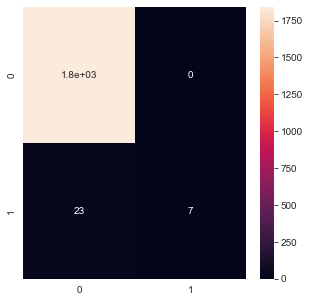

In [168]:
cnfm=confusion_matrix(y_test1, y_pred5)
sns.heatmap(cnfm, annot=True)

In [169]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test1, y_pred5))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1842
           1       1.00      0.23      0.38        30

    accuracy                           0.99      1872
   macro avg       0.99      0.62      0.69      1872
weighted avg       0.99      0.99      0.98      1872



In [170]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
SVM,98.77%,98.77%,98.79%,98.39%,0.0,0.0,0.1
KNN,98.61%,98.61%,98.63%,98.08%,0.0,0.1,0.1
Decision Tree,97.77%,97.77%,97.79%,97.39%,0.0,0.0,0.0
Naive Bayes,98.77%,98.77%,98.79%,98.39%,0.0,0.0,0.0
Adaboost,98.77%,98.77%,98.79%,98.39%,0.2,0.0,0.3


# Recommendation System

In [197]:
df = pd.read_csv('Drug_Data2.csv')
df.head()

,drugName,Prescribed_for,Drug_Review,User_Rating,Date,Count_of_Reviews
0,Actos,"Diabetes, Type 2","""Have been on Actos for almost a year, gained ...",4,09-Jun-10,42
1,Afrezza,"Diabetes, Type 1","""Since I was on the trials I put 6+ months but...",10,12-Feb-15,125
2,"Insulin inhalation, rapid acting","Diabetes, Type 1","""Horrible""",1,13-May-15,9
3,Nucynta ER,Diabetic Peripheral Neuropathy,"""My step dad was using this Medication for les...",1,22-Jul-16,14
4,Liraglutide,"Diabetes, Type 2","""I have been taking Victoza for about a month....",9,30-Mar-17,26


In [198]:
df.columns = df.columns.str.replace(' ', '')

In [199]:
df.shape

(922, 6)

In [215]:
df['average_rating'] = df['User_Rating'].groupby(df['drugName']).transform('sum')/df['Count_of_Reviews']
df['average_rating']=df['average_rating'].replace([np.inf, -np.inf], 1) 
df.head()

,drugName,Prescribed_for,Drug_Review,User_Rating,Date,Count_of_Reviews,average_rating
0,Actos,"Diabetes, Type 2","""Have been on Actos for almost a year, gained ...",4,09-Jun-10,42,0.976190
1,Afrezza,"Diabetes, Type 1","""Since I was on the trials I put 6+ months but...",10,12-Feb-15,125,0.464000
2,"Insulin inhalation, rapid acting","Diabetes, Type 1","""Horrible""",1,13-May-15,9,15.666667
3,Nucynta ER,Diabetic Peripheral Neuropathy,"""My step dad was using this Medication for les...",1,22-Jul-16,14,0.785714
4,Liraglutide,"Diabetes, Type 2","""I have been taking Victoza for about a month....",9,30-Mar-17,26,29.192308


In [214]:
#calculate average
# Calculate mean of rating average column
C = df['average_rating'].mean()
print(C)

20.79205095135711


In [216]:
df.columns

Index(['drugName', 'Prescribed_for', 'Drug_Review', 'User_Rating', 'Date',
       'Count_of_Reviews', 'average_rating'],
      dtype='object')

In [217]:
m = df['Count_of_Reviews'].quantile(0.90)
print(m)

62.0


In [220]:
#calculate weighted average
v = df['Count_of_Reviews']
R = df['average_rating']
df['score'] = (v/(v+m) * R) + (m/(m+v) * C)
df.head()

,drugName,Prescribed_for,Drug_Review,User_Rating,Date,Count_of_Reviews,average_rating,score
0,Actos,"Diabetes, Type 2","""Have been on Actos for almost a year, gained ...",4,09-Jun-10,42,0.976190,12.789492
1,Afrezza,"Diabetes, Type 1","""Since I was on the trials I put 6+ months but...",10,12-Feb-15,125,0.464000,7.203782
2,"Insulin inhalation, rapid acting","Diabetes, Type 1","""Horrible""",1,13-May-15,9,15.666667,20.142354
3,Nucynta ER,Diabetic Peripheral Neuropathy,"""My step dad was using this Medication for les...",1,22-Jul-16,14,0.785714,17.106673
4,Liraglutide,"Diabetes, Type 2","""I have been taking Victoza for about a month....",9,30-Mar-17,26,29.192308,23.273945


In [221]:
df.groupby('drugName')['User_Rating'].mean().sort_values(ascending=False)

drugName
Insulin isophane                  10.0
Novolin 70 / 30                   10.0
Humulin R U-500 (Concentrated)    10.0
Hydrochlorothiazide               10.0
Glimepiride / rosiglitazone       10.0
                                  ... 
Rosiglitazone                      3.0
Insulin lispro                     2.0
Nateglinide                        1.0
Lisinopril                         1.0
Zostrix                            1.0
Name: User_Rating, Length: 105, dtype: float64

In [222]:
df.groupby('drugName')['User_Rating'].count().sort_values(ascending=False)

drugName
Victoza                    98
Liraglutide                89
Trulicity                  68
Dulaglutide                68
Exenatide                  53
                           ..
Losartan                    1
Metformin / sitagliptin     1
Miglitol                    1
Nateglinide                 1
Zostrix                     1
Name: User_Rating, Length: 105, dtype: int64

In [223]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(df.groupby('drugName')['User_Rating'].mean())
ratings['num_ratings'] = pd.DataFrame(df.groupby('drugName')['User_Rating'].count())
ratings

,User_Rating,num_ratings
drugName,,
Acarbose,8.000000,1
ActoPlus Met,10.000000,1
Actos,5.857143,7
Aflibercept,10.000000,1
Afrezza,7.250000,8
...,...,...
Tresiba,5.428571,14
Trulicity,6.485294,68
Victoza,7.775510,98


In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

<AxesSubplot:>

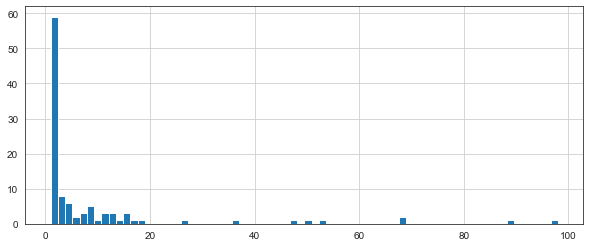

In [225]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))
 
ratings['num_ratings'].hist(bins = 70)

<AxesSubplot:>

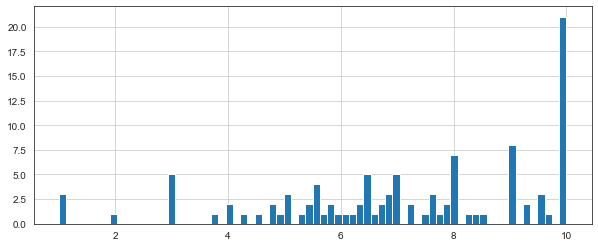

In [226]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))
ratings['User_Rating'].hist(bins = 70)

<AxesSubplot:>

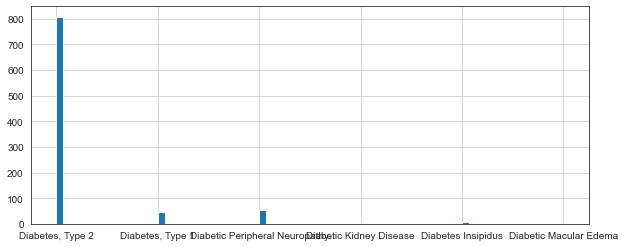

In [227]:
# plot graph of 'score' column
plt.figure(figsize =(10, 4))
df['Prescribed_for'].hist(bins = 70)

In [228]:
# Sorting values according to
# the 'num of rating column'
activity_mat = df.pivot_table(columns ='drugName', values ='User_Rating')
print(activity_mat)

drugName     Acarbose  ActoPlus Met     Actos  Aflibercept  Afrezza  \
User_Rating       8.0          10.0  5.857143         10.0     7.25   

drugName     Albiglutide  Amaryl  Apidra  Avandia  Avapro  ...  Tapentadol  \
User_Rating          7.0     7.6    10.0      3.0     9.0  ...    9.666667   

drugName     Topiramate  Toujeo  Toujeo Solostar  Tradjenta   Tresiba  \
User_Rating         7.0     4.5              5.0        3.0  5.428571   

drugName     Trulicity  Victoza  Welchol  Zostrix  
User_Rating   6.485294  7.77551      4.0      1.0  

[1 rows x 105 columns]


In [229]:
ratings.sort_values('num_ratings', ascending = False).head(10)

,User_Rating,num_ratings
drugName,,
Victoza,7.775510,98
Liraglutide,8.528090,89
Trulicity,6.485294,68
Dulaglutide,6.088235,68
Exenatide,7.622642,53
Canagliflozin,6.840000,50
Invokana,6.520833,48
Bydureon,6.666667,36
Metformin,6.269231,26


In [231]:
# analysing correlation with similar movies
Exenatide_user_ratings = activity_mat['Exenatide']
Victoza_user_ratings = activity_mat['Victoza']
Victoza_user_ratings

User_Rating    7.77551
Name: Victoza, dtype: float64

In [236]:
# analysing correlation with similar movies
similar_to_Victoza = activity_mat.corrwith(Victoza_user_ratings)
similar_to_Exenatide = activity_mat.corrwith(Exenatide_user_ratings)
corr_Victoza = pd.DataFrame(similar_to_Victoza, columns =['Correlation'])
corr_Victoza=corr_Victoza.fillna(1)
corr_Victoza.head()

,Correlation
drugName,
Acarbose,1.0
ActoPlus Met,1.0
Actos,1.0
Aflibercept,1.0
Afrezza,1.0
